# Titanic survival prediction:

In [57]:
import pandas as pd

In [58]:
data = pd.read_csv("C:\\Users\\Navneet Raj\\Documents\\Codsoft Intership project\\Titanic-Dataset.csv")

In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
# Check all the information present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
# Check missing Values of the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
# Drop columns which is not relevant
data.drop('Cabin', axis=1, inplace=True)

In [63]:
# Calculate the average age 
data['Age'].mean()

29.69911764705882

In [64]:
# Fill the average value in place of missing values 
data.fillna(30, inplace=True)

In [65]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [66]:
# Preprocess the data
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [67]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

In [68]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',]]
y = data['Survived']

In [69]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
# Train the model for prediction 
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()

In [72]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred = rfc.predict(X_test)

In [74]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [75]:
# Evaluate the accuracy of the model
from sklearn.metrics import accuracy_score

In [76]:
accuracy = accuracy_score(y_test, y_pred)

In [77]:
('accuracy:',accuracy)

('accuracy:', 0.8026905829596412)

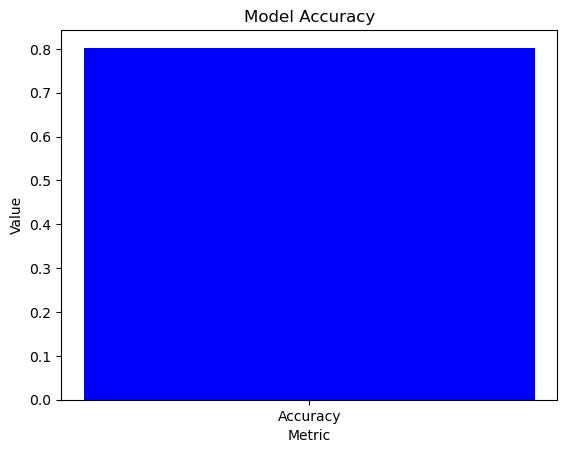

In [78]:
# Create a bar chart of the accuracy
labels = ['Accuracy']
values = [accuracy]

plt.bar(labels, values, color='blue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Accuracy')
plt.show()

In [79]:
# Make a prediction on new data
new_data = pd.DataFrame({
    'Pclass': [1, 2, 3],
    'Sex': [0, 1, 0],
    'Age': [20, 30, 40],
    'SibSp': [0, 1, 2],
    'Parch': [0, 1, 2],
    'Fare': [100,200,300]})
predictions = rfc.predict(new_data)
('Predictions:', predictions)

('Predictions:', array([0, 1, 0], dtype=int64))

In [80]:
# Create a bar chart of the predictions
import matplotlib.pyplot as plt

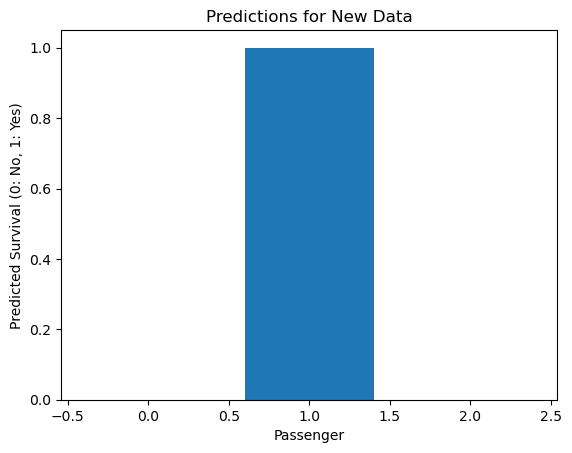

In [81]:
plt.bar(range(len(predictions)), predictions)
plt.xlabel('Passenger')
plt.ylabel('Predicted Survival (0: No, 1: Yes)')
plt.title('Predictions for New Data')
plt.show()

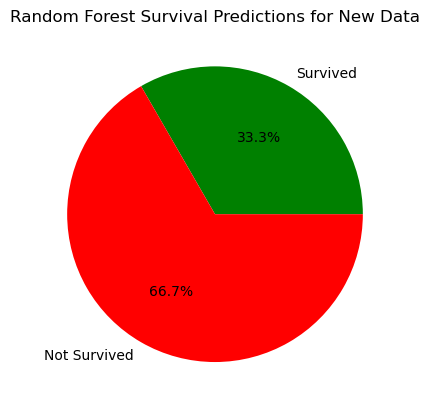

In [82]:
# Create a pie chart of the predictions
labels = ['Survived', 'Not Survived']
sizes = [len(predictions[predictions == 1]), len(predictions[predictions == 0])]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Random Forest Survival Predictions for New Data')
plt.show()